In [2]:
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader
import torchvision.transforms as transforms

import numpy as np
import torch
import polars as pl
import matplotlib.pyplot as plt
import pickle

In [3]:
dataset = get_dataset(dataset="poverty", download=True)

In [4]:
# Get the training set
train_data = dataset.get_subset(
    "train",
)

In [5]:
train_loader = get_train_loader("standard", train_data, batch_size=64)

In [6]:
meta = pl.read_csv("./data/poverty_v1.1/dhs_metadata.csv")
meta.filter((pl.col('year') >= 2009) & (pl.col('year') <= 2017))

lat,lon,wealthpooled,country,year,urban,nl_mean,nl_center,households
f64,f64,f64,str,i64,bool,f64,f64,i64
-11.915085,22.876839,-1.019361,"""angola""",2011,false,-0.086633,0.016189,37
-11.886975,22.924997,-1.090052,"""angola""",2011,false,-0.097684,-0.173862,37
-9.498591,17.830034,-1.143002,"""angola""",2011,false,-0.141589,-0.173862,37
-8.864,13.240764,1.056769,"""angola""",2011,true,15.228898,14.859587,32
-8.87411,13.197329,1.454064,"""angola""",2011,true,11.082343,13.063629,33
-8.868386,13.208145,1.708446,"""angola""",2011,true,12.646744,13.747999,32
-8.947241,13.196158,1.70111,"""angola""",2011,true,5.055367,3.699145,36
-8.872391,13.268747,1.547713,"""angola""",2011,true,12.907397,13.636263,37
-8.865831,13.273651,1.592463,"""angola""",2011,true,13.152287,13.359031,37


In [7]:
# Get the training set
train_data = dataset.get_subset(
    "train",
)

In [8]:
def show_channels(id, figsize=(12, 6)):
    fig, axs = plt.subplots(2, 4, figsize=figsize)

    for i in range(8):
        axs[i//4][i%4].imshow(dataset[id][0][i])
    
    print(f'wealth index: {dataset[id][1][0]}')

In [9]:
def show_image(id):
    # definitely not accurate...
    plt.imshow((torch.stack([dataset[id][0][2], dataset[id][0][1], dataset[id][0][0]], dim=2)+1.2290)/(2.6758+1.2290))
    
    print(f'wealth index: {dataset[id][1][0]}')

In [10]:
with open('./data/poverty_v1.1/dhs_incountry_folds.pkl', 'rb') as f:
    incountry_folds = pickle.load(f)

In [11]:
train_data[0][0].shape

torch.Size([8, 224, 224])

In [12]:
train_data[0][1]

tensor([-0.9598])

wealth index: -0.8011965155601501


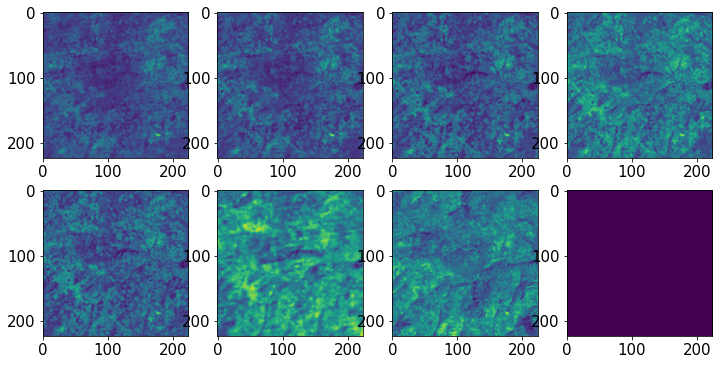

In [39]:
show_channels(77)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


wealth index: 0.6238669157028198


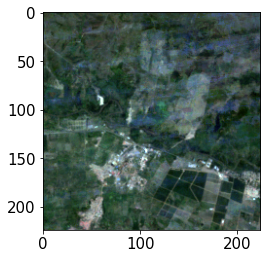

In [44]:
show_image(319)

In [15]:
incountry_folds

{'A': {'test': array([   24,    32,    35, ..., 19666, 19667, 19668]),
  'val': array([    3,     4,     5, ..., 19624, 19625, 19663]),
  'train': array([    0,     1,     2, ..., 19660, 19661, 19662])},
 'B': {'test': array([    3,     4,     5, ..., 19624, 19625, 19663]),
  'val': array([    2,    25,    40, ..., 19653, 19654, 19655]),
  'train': array([    0,     1,    13, ..., 19666, 19667, 19668])},
 'C': {'test': array([    2,    25,    40, ..., 19653, 19654, 19655]),
  'val': array([   31,    34,    51, ..., 19638, 19657, 19662]),
  'train': array([    0,     1,     3, ..., 19666, 19667, 19668])},
 'D': {'test': array([   31,    34,    51, ..., 19638, 19657, 19662]),
  'val': array([    0,     1,    13, ..., 19658, 19660, 19661]),
  'train': array([    2,     3,     4, ..., 19666, 19667, 19668])},
 'E': {'test': array([    0,     1,    13, ..., 19658, 19660, 19661]),
  'val': array([   24,    32,    35, ..., 19666, 19667, 19668]),
  'train': array([    2,     3,     4, ..., 1965

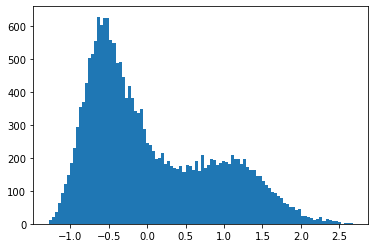

In [16]:
plt.hist(meta.select(pl.col('wealthpooled')), bins=100)
plt.show()

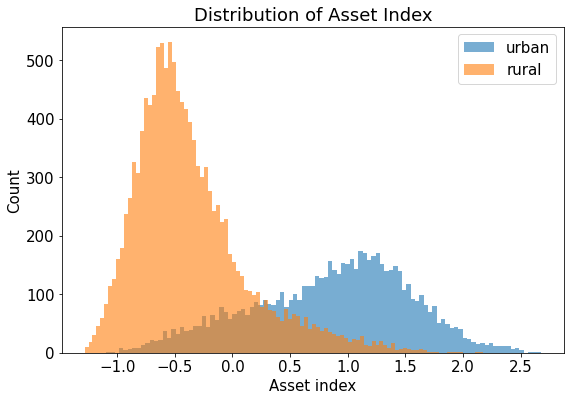

In [27]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.hist(meta.filter(pl.col('urban') == 1).select('wealthpooled'), bins=100, alpha=0.6, color = 'tab:blue', label='urban')
ax.hist(meta.filter(pl.col('urban') == 0).select('wealthpooled'), bins=100, alpha=0.6, color = 'tab:orange', label='rural')
ax.legend()
ax.set_xlabel('Asset index')
ax.set_ylabel('Count')
ax.set_title('Distribution of Asset Index')
fig.show()

In [18]:
meta['country'].unique()

country
str
"""cameroon"""
"""senegal"""
"""malawi"""
"""rwanda"""
"""sierra_leone"""
"""democratic_rep..."
"""guinea"""
"""burkina_faso"""
"""angola"""


In [19]:
def plot_per_country(group_df):
    country = group_df['country'][0]
    plt.hist(group_df.filter(pl.col('urban') == 1).select('wealthpooled'), bins=20, alpha=0.6, label='urban')
    plt.hist(group_df.filter(pl.col('urban') == 0).select('wealthpooled'), bins=20, alpha=0.6, label='rural')
    plt.legend()
    plt.title(country)
    plt.show()
    return group_df.mean().fill_null(country)

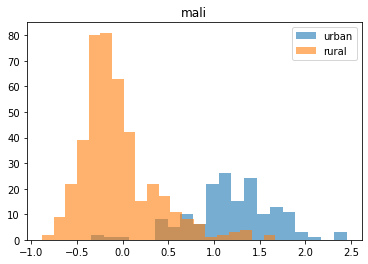

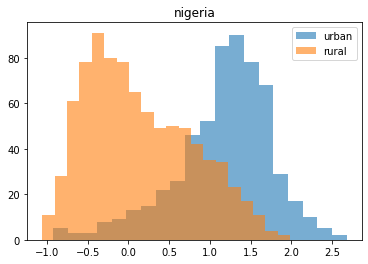

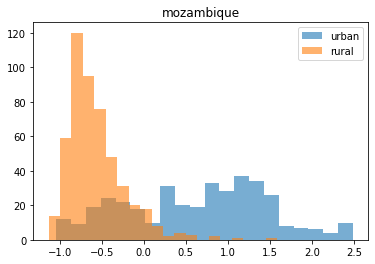

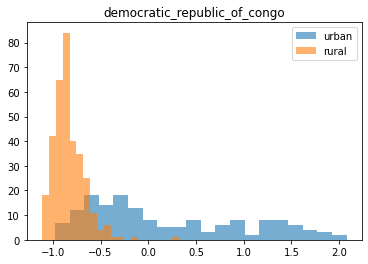

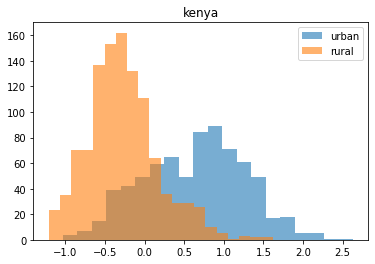

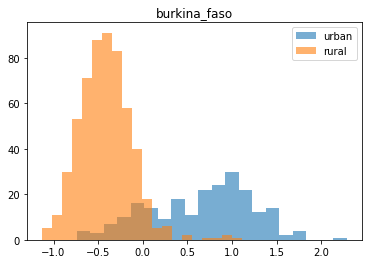

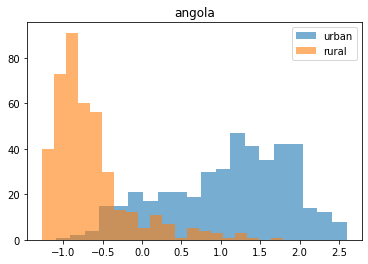

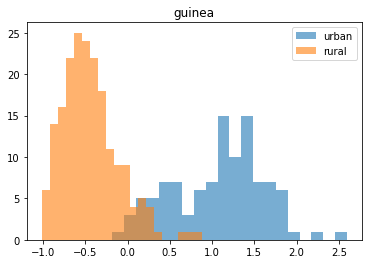

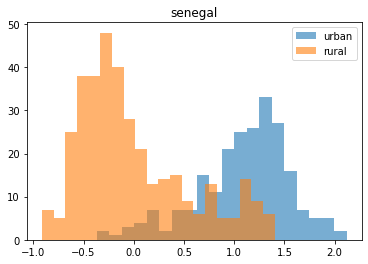

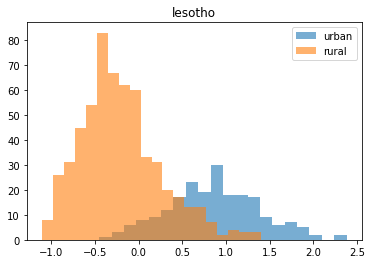

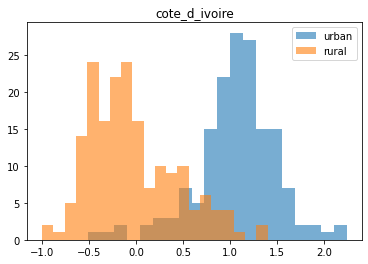

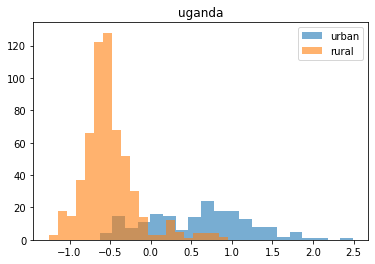

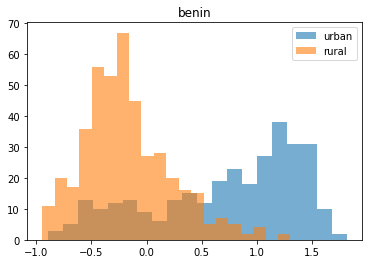

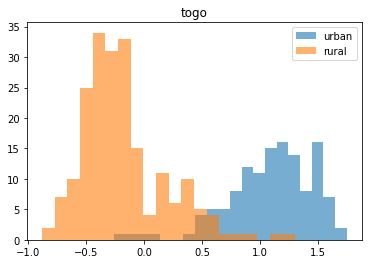

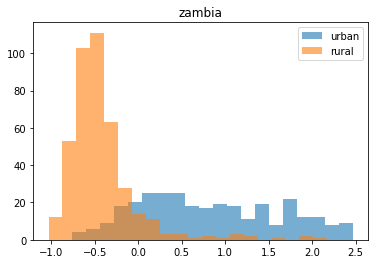

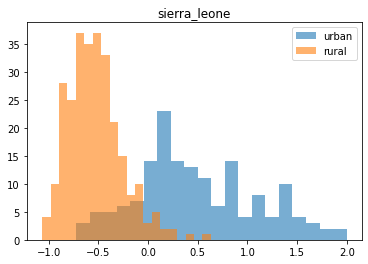

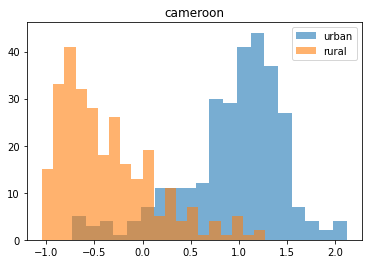

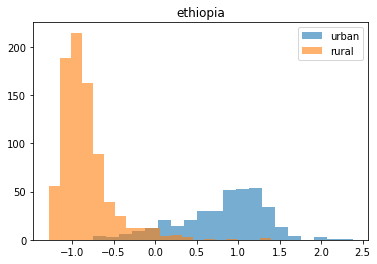

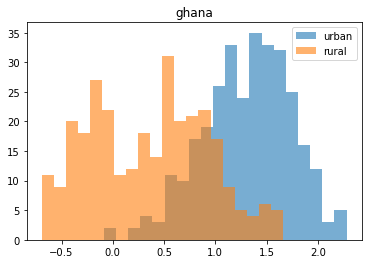

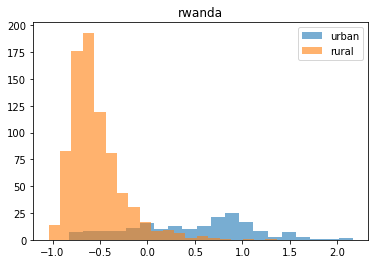

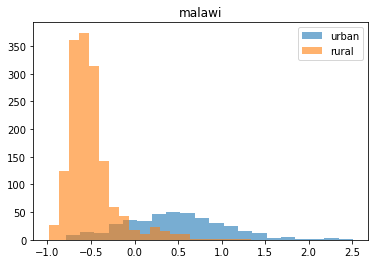

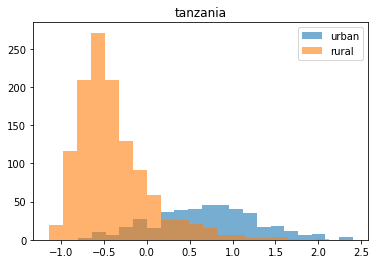

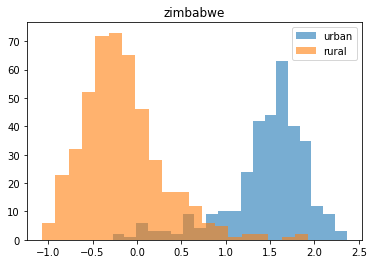

lat,lon,wealthpooled,country,year,urban,nl_mean,nl_center,households
f64,f64,f64,str,f64,f64,f64,f64,f64
13.181135,-6.950935,0.283999,"""mali""",2012.9,0.272881,0.184673,0.294324,24.277966
8.447233,7.315215,0.551582,"""nigeria""",2012.949655,0.404138,0.159893,0.209564,35.53931
-19.341876,35.277227,-0.052416,"""mozambique""",2010.385666,0.428896,0.62185,0.741916,22.612059
-3.268139,22.682453,-0.506605,"""democratic_rep...",2013.0,0.321138,0.105529,0.173128,33.605691
-0.426088,36.742122,0.088394,"""kenya""",2014.13388,0.398907,0.013883,0.096952,23.057923
12.202241,-1.912814,-0.11131,"""burkina_faso""",2011.257288,0.282636,0.060008,0.092986,25.012674
-10.764717,15.479372,0.230511,"""angola""",2013.923977,0.512281,1.598644,2.052535,26.667836
10.267359,-11.816209,0.10109,"""guinea""",2012.0,0.356667,-0.059938,0.021661,23.533333
14.268917,-15.488564,0.416424,"""senegal""",2010.683761,0.386325,0.248792,0.406692,20.408547


In [20]:
meta.groupby('country').apply(plot_per_country)